[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task2_dmrf_visual.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков



In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Загрузим датафрейм из 1 задания
df = pd.read_pickle('house_data.pkl')

In [3]:
# Посмотрим какие есть поля в данных
for i, tp in enumerate(zip(df.columns, df.dtypes)):
    print(i, *tp)

0 id int64
1 pdId int64
2 region int64
3 address object
4 objElemLivingCnt int64
5 objReady100PercDt object
6 wallMaterialShortDesc object
7 objLkFinishTypeDesc object
8 objLkFreePlanDesc object
9 objElemParkingCnt int64
10 objSquareLiving float64
11 rpdNum object
12 rpdPdfLink object
13 rpdIssueDttm object
14 objLkLatitude object
15 objLkLongitude object
16 objCompensFundFlg int64
17 objProblemFlg int64
18 objLkClassDesc object
19 loadDttm object
20 photoRenderDTO object
21 objGuarantyEscrowFlg int64
22 objectType object
23 residentialBuildings int64
24 newBuildingId int64
25 objFlatCnt int64
26 objFlatSq object
27 objNonlivElemCnt int64
28 objStatus int64
29 isAvailableWantLiveHere bool
30 objInfrstrBicycleLaneFlg int64
31 objInfrstrRampFlg int64
32 objInfrstrCurbLoweringFlg int64
33 objectTransportInfo object
34 conclusion bool
35 objGreenHouseFlg int64
36 objEnergyEffShortDesc object
37 infrastructureIndexValue int64
38 developer.devId int64
39 developer.devShortCleanNm object
40 d

In [4]:
# Достанем полезные поля
field_list = []
field_list.extend(['id', 'region', 'address', 'nameObj'])
field_list.extend(['objSquareLiving', 'objReady100PercDt', 'objElemParkingCnt'])
field_list.extend(['objLkClassDesc', 'objFlatCnt', 'infrastructureIndexValue'])
field_list.extend(['floorMin', 'floorMax', 'metro.isWalk', 'metro.time'])
field_list.extend(['objPriceAvg', 'soldOutPerc', 'transportDistIndexValue'])
df_slice = df[field_list]
df_slice.head()

,id,region,address,nameObj,objSquareLiving,objReady100PercDt,objElemParkingCnt,objLkClassDesc,objFlatCnt,infrastructureIndexValue,floorMin,floorMax,metro.isWalk,metro.time,objPriceAvg,soldOutPerc,transportDistIndexValue
0,29679,61,г Таганрог,NaN,1519.00,2020-03-31,0,Комфорт,18,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,72,г Тюмень,NaN,6293.78,2022-12-31,31,Элитный,68,10,4.0,20.0,NaN,NaN,53109.0,0.407164,NaN
2,13397,72,"г Тюмень, ул Профсоюзная, д. 56",NaN,6248.51,2024-12-31,0,Элитный,65,10,6.0,12.0,NaN,NaN,45523.0,0.999984,NaN
3,13399,72,"г Тюмень, ул Профсоюзная, д. 56",NaN,0.00,2024-12-31,125,Элитный,0,10,1.0,1.0,NaN,NaN,50768.0,0.917243,NaN
4,13398,72,"г Тюмень, ул Профсоюзная, д. 56",NaN,4812.98,2024-12-31,0,Элитный,43,10,7.0,10.0,NaN,NaN,47886.0,1.000000,NaN


In [5]:
# Создадим словарь мэппинга названий регионов
regions = {}
with open('region_codes.csv', encoding='utf8') as fin:
    fin.readline()
    for line in fin:
        key, value = line.strip().split(';')
        key = int(key)
        value = value.strip('"')
        regions[key] = value

In [6]:
# Создадим полное наименование региона в df
df_slice['region_full'] = df_slice['region'].apply(lambda x: regions[x])
df_slice[['region', 'region_full']].head()

<ipython-input-6-5308a73b0a51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['region_full'] = df_slice['region'].apply(lambda x: regions[x])


,region,region_full
0,61,Ростовская область
1,72,Тюменская область
2,72,Тюменская область
3,72,Тюменская область
4,72,Тюменская область


In [7]:
# Расчет средней цены за квадрат по регионам
means = df_slice[['region_full', 'objPriceAvg']].groupby('region_full').mean()
means

,objPriceAvg
region_full,
Алтайский край,69277.373333
Амурская область,114035.125000
Архангельская область,83551.824561
Астраханская область,78467.689655
Белгородская область,80215.931818
...,...
Ямало-Ненецкий автономный округ,91061.227273
Ярославская область,67271.732394
г. Москва,314312.857355


In [8]:
# проверка что среднее не учитывает пустых значений
df[df['region'] == 92]['objPriceAvg'].mean(skipna=True)

116858.04761904762

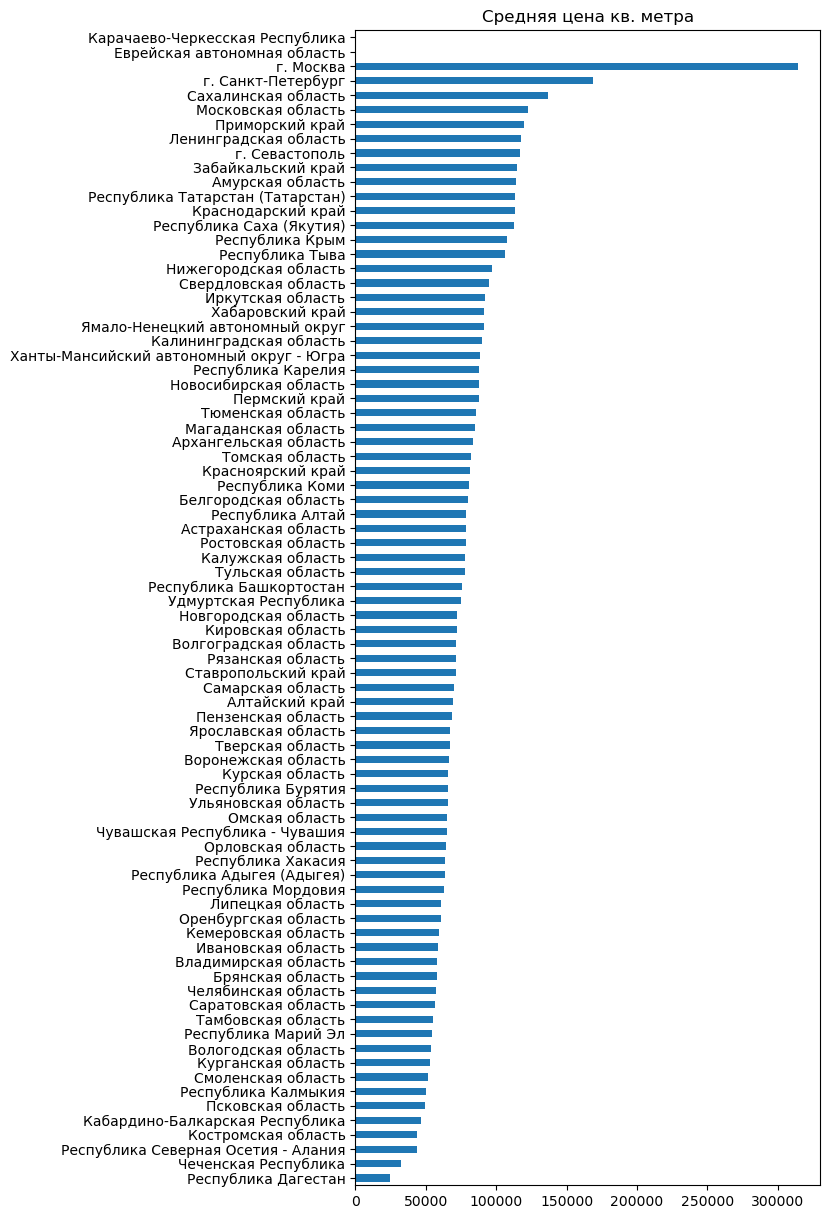

In [9]:
# Как и ожидалось самые высокие цены на жилье в Москве и Санкт-Петербурге
# Немного удивило, что самые низкие цены на Кавказе
means.sort_values(by='objPriceAvg').plot(figsize=(6, 15), kind='barh', legend=False,
                                         xlabel='', title='Средняя цена кв. метра')
plt.show()

In [10]:
# Средние цены в разрезе класса жилья
df_class_price = df_slice[['region_full',
                           'objLkClassDesc',
                           'objPriceAvg']].groupby(['region_full', 
                                                    'objLkClassDesc']).mean().unstack()
df_class_price.columns = df_class_price.columns.get_level_values(1)
df_class_price.columns.name = None
df_class_price.sample(5)

,Бизнес,Другое,Комфорт,Типовой,Элитный
region_full,,,,,
Ростовская область,88939.952381,NaN,81122.580153,63049.000000,118671.666667
Республика Калмыкия,NaN,NaN,51757.200000,49211.000000,NaN
Республика Крым,144462.909091,NaN,109643.734177,84554.181818,192262.250000
Архангельская область,101759.333333,NaN,94460.750000,56638.529412,93734.000000
Курская область,68650.750000,NaN,69241.363636,63054.857143,NaN


In [11]:
# Посмотрим, что по Москве :-)
print(df_class_price.loc['г. Москва', :].dropna())

Бизнес     306458.425620
Комфорт    197662.488722
Типовой    221921.705314
Элитный    715853.956044
Name: г. Москва, dtype: float64


In [12]:
# Модули для интерактивности
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [13]:
# Функции для интерактивности
def barh_plot(df, region1, region2):
    fig, axes = plt.subplots(figsize=(15, 6), nrows=1, ncols=2, sharex=True)
    sub_df1 = df.loc[region1, :]
    sub_df2 = df.loc[region2, :]
    sub_df1.plot(ax=axes[0], kind='barh', xlabel='', ylabel='', title=f'Средняя цена кв. метра {region1}')
    sub_df2.plot(ax=axes[1], kind='barh', xlabel='', ylabel='', title=f'Средняя цена кв. метра {region2}')
    
    
def f1(region1, region2):
    barh_plot(df_class_price, region1, region2)

In [15]:
# Построим сравнение двух регионов по классам недвижимости
# Интересно, что за счет Сочи в Краснодарском крае средняя цена элитного дома даже выше, чем в Москве
interact(f1, region1=list(df_class_price.index), region2=list(df_class_price.index));

interactive(children=(Dropdown(description='region1', options=('Алтайский край', 'Амурская область', 'Архангел…

In [16]:
# Посчитаем количество домов выводимых по регионам по годам
build_speed = df_slice[['region_full', 'id']]
build_speed['year'] = pd.to_datetime(df_slice['objReady100PercDt'], yearfirst=True).dt.year
df_filter = (build_speed['year'] > 2021) & (build_speed['year'] < 2030)
build_speed = build_speed[df_filter].groupby(['region_full', 'year']).count().reset_index()

<ipython-input-16-b87b9896d879>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build_speed['year'] = pd.to_datetime(df_slice['objReady100PercDt'], yearfirst=True).dt.year


In [17]:
# Функции для интерактивности
def sns_plot(df, region1, region2):
    sns.relplot(
        x='year',
        y='id',
        hue='region_full',
        data=df[df['region_full'].isin([region1, region2])],
        kind='line',
        aspect=2
    )
    plt.title('Количество вводимого жилья по годам', size=20)
    plt.show()
    
    
def f2(region1, region2):
    sns_plot(build_speed, region1, region2)

In [18]:
# Как и ожидалось в Москве больше новостроек, чем в Санкт-Петербурге
interact(f2, region1=list(build_speed.region_full.unique()), region2=list(build_speed.region_full.unique()));

interactive(children=(Dropdown(description='region1', options=('Алтайский край', 'Амурская область', 'Архангел…

In [19]:
# Маппинг исследуемых параметров
params_mapping = {
    'region_full': 'Регион',
    'floorMax': 'Этажность дома',
    'objFlatCnt': 'Количество квартир',
    'objSquareLiving': 'Жилая площадь',
    'objElemParkingCnt': 'Количество парковочных мест',
    'objPriceAvg': 'цена за квадратный метр'
}

In [20]:
# Делаем срез от среза данных
df2 = df_slice[[*params_mapping.keys()]].rename(columns=params_mapping)
df2.head()

,Регион,Этажность дома,Количество квартир,Жилая площадь,Количество парковочных мест,цена за квадратный метр
0,Ростовская область,NaN,18,1519.00,0,NaN
1,Тюменская область,20.0,68,6293.78,31,53109.0
2,Тюменская область,12.0,65,6248.51,0,45523.0
3,Тюменская область,1.0,0,0.00,125,50768.0
4,Тюменская область,10.0,43,4812.98,0,47886.0


In [21]:
# Функции для интерактивности
def sns_pair(df, region1, region2):
    df_slice = df[df['Регион'].isin([region1, region2])]
    sns.pairplot(df_slice, hue='Регион', dropna=True)
    plt.show()
    
    
def f3(region1, region2):
    sns_pair(df2, region1, region2)

In [22]:
# Анализ зависимости параметров дома и цены за кв. метр
regs = df2['Регион'].unique()
print('Зависимости параметров дома и цены кв. метра')
interact(f3, region1=regs, region2=regs);

Зависимости параметров дома и цены кв. метра


interactive(children=(Dropdown(description='region1', options=('Ростовская область', 'Тюменская область', 'Ста…

# Вывод
Как видно из pairplot никакой зависимости между стоимостью квартиры и параметрами дома нет, влияет только расположение. Единственная (очевидная) зависимость - это жилая площадь и количество квартир. Также интересно, что в многоквартирных домах очень мало парковочных мест. И что корреляция этажности с количеством квартир и жилой площадью совсем неярко выражена.